In [1]:
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import math
from LatLongUTMconversion import LLtoUTM, UTMtoLL
import mission_plan as mp

In [2]:
# Function definitions

def dist_2points(x1, y1, x2, y2):
    distance = math.sqrt(((x1-x2)**2)+((y1-y2)**2))
    return distance

def get_offset_coords(x, y, slope, dist):
    new_x = x + dist*math.sqrt( 1/(1+math.pow(slope,2)) )
    new_y = y + slope*dist*math.sqrt( 1/(1+math.pow(slope,2)) )
    return(new_x,new_y)

In [3]:
#Original White line measurements in [lattitude, longitude]
lane1_sp = [41.3907390,-73.9533992]
lane1_ep = [41.3915678,-73.9529756]

In [4]:
# Convert line coords to UTM and show distance
(zone,easting,northing)=LLtoUTM(23, lane1_sp[0], lane1_sp[1])
lane1_utm_sp = (easting,northing)

(zone,easting,northing)=LLtoUTM(23, lane1_ep[0], lane1_ep[1])
lane1_utm_ep = (easting,northing)

print("Zone: ", zone)
print("Line start point: ", lane1_utm_sp)
print("Line  end  point: ", lane1_utm_ep)
dist = dist_2points(lane1_utm_sp[0], lane1_utm_sp[1], lane1_utm_ep[0], lane1_utm_ep[1]) 
print("Distance between 2 points is: ", dist)

('Zone: ', '18T')
('Line start point: ', (587499.4842379672, 4582662.702454261))
('Line  end  point: ', (587533.787291701, 4582755.143214812))
('Distance between 2 points is: ', 98.60017092639066)


In [5]:
# Compute slope and perpendicular slope
lane1_slope = (lane1_utm_sp[1] - lane1_utm_ep[1]) / (lane1_utm_sp[0] - lane1_utm_ep[0])
line_slope = -1/lane1_slope
print("The slope of the line is:", lane1_slope, "\nThe perpendicular slope is: ",(-1/lane1_slope))
yaw = math.atan(lane1_slope)
print("Yaw in degrees:", yaw*180/math.pi)

('The slope of the line is:', 2.694825984544903, '\nThe perpendicular slope is: ', -0.37108147454978546)
('Yaw in degrees:', 69.64104295165482)


In [6]:
# Mission parameters
altitude = 20           # in meters
speed = 3.5             # in m/s
cam_mount_angle = 60    # in degrees
cam_fov = 60.6          # in degrees

In [7]:
# Compute offset from the line
angle = (90 - cam_mount_angle + cam_fov /2)
angle_rad = (angle*math.pi/180)
dist = altitude * math.tan(0.25 * angle_rad) # 0.25 is to get 1/4th of fov on road. 
print("The offset distance is:",dist, "m (FOV:",cam_fov, "deg.,", angle,"deg.)")

('The offset distance is:', 5.387053283675236, 'm (FOV:', 60.6, 'deg.,', 60.3, 'deg.)')


In [8]:
pnt_1 = get_offset_coords(lane1_utm_sp[0],lane1_utm_sp[1],line_slope,dist)
pnt_2 = get_offset_coords(lane1_utm_ep[0],lane1_utm_ep[1],line_slope,dist)
pnt_3 = get_offset_coords(lane1_utm_ep[0],lane1_utm_ep[1],line_slope,(-1*dist))
pnt_4 = get_offset_coords(lane1_utm_sp[0],lane1_utm_sp[1],line_slope,(-1*dist))

ll_pt1 = UTMtoLL(23, pnt_1[1], pnt_1[0], '18T')
ll_pt2 = UTMtoLL(23, pnt_2[1], pnt_2[0], '18T')
ll_pt3 = UTMtoLL(23, pnt_3[1], pnt_3[0], '18T')
ll_pt4 = UTMtoLL(23, pnt_4[1], pnt_4[0], '18T')

print("wp1:",ll_pt1[0],ll_pt1[1])
print("wp2:",ll_pt2[0],ll_pt2[1])
print("wp3 ",ll_pt3[0],ll_pt3[1])
print("wp4 ",ll_pt4[0],ll_pt4[1])
print(lane1_utm_sp)

('wp1:', 41.3907216, -73.9533391)
('wp2:', 41.3915504, -73.9529155)
('wp3 ', 41.3915852, -73.9530357)
('wp4 ', 41.3907564, -73.9534593)
(587499.4842379672, 4582662.702454261)


In [9]:
print(ll_pt1)

(41.3907216, -73.9533391)


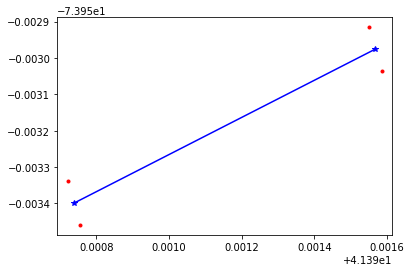

In [10]:
plt.figure(1) 
plt.axis('equal')    
#plt.gca().add_line(mlines.Line2D([lane1_sp[0],lane1_sp[1]], [lane1_ep[0],lane1_ep[1]]))
plt.plot([lane1_sp[0],lane1_ep[0]], [lane1_sp[1],lane1_ep[1]], marker='*',color='blue')
plt.plot(ll_pt1[0],ll_pt1[1], 'r.')
plt.plot(ll_pt2[0],ll_pt2[1], 'r.')
plt.plot(ll_pt3[0],ll_pt3[1], 'r.')
plt.plot(ll_pt4[0],ll_pt4[1], 'r.')


In [11]:
yaw = 289
wp1 = [ll_pt1[0],ll_pt1[1],altitude,3]
wp2 = [ll_pt2[0],ll_pt2[1],altitude,2] 
wp3 = [ll_pt3[0],ll_pt3[1],altitude,3] 
wp4 = [ll_pt3[0],ll_pt3[1],altitude,5] 
wp5 = [ll_pt4[0],ll_pt4[1],altitude,0]
waypoints = [wp1,wp2,wp3,wp4,wp5]

with open('bhg_flight.plan', 'w') as f:
    plan = mp.make_plan(waypoints,speed,yaw)
    print(plan)
    f.write(plan)

('Waypoints are: ', [[41.3907216, -73.9533391, 20, 3], [41.3915504, -73.9529155, 20, 2], [41.3915852, -73.9530357, 20, 3], [41.3915852, -73.9530357, 20, 5], [41.3907564, -73.9534593, 20, 0]])
{
    "fileType": "Plan",
    "geoFence": {
        "circles": [
        ],
        "polygons": [
        ],
        "version": 2
    },
    "groundStation": "QGroundControl",
    "mission": {
        "cruiseSpeed": 15,
        "firmwareType": 3,
        "hoverSpeed": 3.5,
        "items": [
            {
                "autoContinue": true,
                "command": 115,
                "doJumpId": 1,
                "frame": 0,
                "params": [
                    289,
                    5,
                    1,
                    0,
                    0,
                    0,
                    0
                ],
                "type": "SimpleItem"
            },
            {
                "AMSLAltAboveTerrain": null,
                "Altitude": 20,
                "Alt